## ANN Model

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adadelta, Adamax, Adam
from tensorflow.keras.models import model_from_json
from tensorflow.keras.callbacks import EarlyStopping
import math

matplotlib.use('Agg')
%matplotlib inline
Imputer = SimpleImputer
scaler = MinMaxScaler(feature_range=(0, 1))
label_encoder = LabelEncoder()
np.random.seed(11)

In [2]:
def load_csv(data):
    return pd.read_csv(data)

In [3]:
def drop_column(data, column):
    return data.drop(columns=column, axis=1)

In [4]:
def encoder(data):
    values = data['Kecamatan']
    integer_encoded = label_encoder.fit_transform(values)
    data['Kecamatan'] = integer_encoded
    return data

In [5]:
def decoder(data):
    values = data['Kecamatan']
    data['Kecamatan'] = label_encoder.inverse_transform(values)
    return data

In [6]:
df = load_csv('data/data.csv')

In [7]:
df['Bulan'] = pd.to_datetime(df.Bulan)

In [8]:
df.sort_values(by='Bulan', ascending=True)

,Tahun,Bulan,Jumlah Kasus,Kecamatan,Suhu,Kelembapan,Curah_hujan,Lama_penyinaran_matahari,Angin,Jumlah_penduduk,IR
456,2015,2015-01-01,3,Banda Raya,26.6,81.0,81.6,6.0,2.0,23034,13.024225
444,2015,2015-01-01,2,Jaya Baru,26.6,81.0,81.6,6.0,2.0,24561,8.142991
492,2015,2015-01-01,4,Kuta Alam,26.6,81.0,81.6,6.0,2.0,49706,8.047318
480,2015,2015-01-01,3,Lueng Bata,26.6,81.0,81.6,6.0,2.0,24660,12.165450
468,2015,2015-01-01,1,Baiturrahman,26.6,81.0,81.6,6.0,2.0,35363,2.827814
...,...,...,...,...,...,...,...,...,...,...,...
59,2019,2019-12-01,4,Lueng Bata,26.3,83.0,22.8,4.0,3.0,24278,16.475822
71,2019,2019-12-01,1,Kuta Alam,26.3,83.0,22.8,4.0,3.0,43195,2.315083
23,2019,2019-12-01,6,Jaya Baru,26.3,83.0,22.8,4.0,3.0,25039,23.962618
95,2019,2019-12-01,3,Syiah Kuala,26.3,83.0,22.8,4.0,3.0,32317,9.283040


In [9]:
df = drop_column(df,['Tahun','Suhu','Kelembapan','Curah_hujan',
                    'Lama_penyinaran_matahari','Angin','Jumlah_penduduk','IR'])

In [10]:
df

,Bulan,Jumlah Kasus,Kecamatan
0,2019-01-01,5,Meuraxa
1,2019-02-01,10,Meuraxa
2,2019-03-01,4,Meuraxa
3,2019-04-01,2,Meuraxa
4,2019-05-01,0,Meuraxa
...,...,...,...
535,2015-08-01,0,Ulee Kareng
536,2015-09-01,0,Ulee Kareng
537,2015-10-01,1,Ulee Kareng
538,2015-11-01,2,Ulee Kareng


In [11]:
df['total_kasus'] = df['Jumlah Kasus']

In [12]:
df

,Bulan,Jumlah Kasus,Kecamatan,total_kasus
0,2019-01-01,5,Meuraxa,5
1,2019-02-01,10,Meuraxa,10
2,2019-03-01,4,Meuraxa,4
3,2019-04-01,2,Meuraxa,2
4,2019-05-01,0,Meuraxa,0
...,...,...,...,...
535,2015-08-01,0,Ulee Kareng,0
536,2015-09-01,0,Ulee Kareng,0
537,2015-10-01,1,Ulee Kareng,1
538,2015-11-01,2,Ulee Kareng,2


In [13]:
group_district = df.groupby(['Kecamatan']).agg('sum')
group_district

,Jumlah Kasus,total_kasus
Kecamatan,,
Baiturrahman,105,105
Banda Raya,91,91
Jaya Baru,114,114
Kuta Alam,127,127
Kuta Raja,87,87
Lueng Bata,103,103
Meuraxa,151,151
Syiah Kuala,94,94
Ulee Kareng,117,117


In [14]:
df = drop_column(df,['Bulan','Jumlah Kasus'])

In [15]:
df = encoder(df)
df

,Kecamatan,total_kasus
0,6,5
1,6,10
2,6,4
3,6,2
4,6,0
...,...,...
535,8,0
536,8,0
537,8,1
538,8,2


In [16]:
# df_group = df.groupby(['Kecamatan']).agg('sum')

In [17]:
df = df.astype('float32')

In [18]:
df

,Kecamatan,total_kasus
0,6.0,5.0
1,6.0,10.0
2,6.0,4.0
3,6.0,2.0
4,6.0,0.0
...,...,...
535,8.0,0.0
536,8.0,0.0
537,8.0,1.0
538,8.0,2.0


In [91]:
 def split_data(data):
        X = data[:,[1]]
        y = data[:,0]
        y = y.reshape(-1,1)
    
        X_scaled = scaler.fit_transform(X)
        y_scaled = scaler.fit_transform(y)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.3,
                                                           random_state=42,
                                                           )
        return X_train, X_test, y_train, y_test


In [92]:
X_train, X_test, y_train, y_test = split_data(df.values)

[[6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [8.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.

In [84]:
X_test[0],X_train[0],len(X_test)

(array([0.2631579], dtype=float32), array([0.05263158], dtype=float32), 162)

In [22]:
def soft_acc(y_true, y_pred):
        return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [100]:
def training(X_train, X_test, y_train, y_test, optimizer='Adam'):
        model = Sequential()
        model.add(Dense(1, input_dim=1, activation='relu'))  # inputlayer
        model.add(Dense(8, activation='relu'))  # hiddenlayer
        model.add(Dense(1, activation='linear'))  # outputlayer
#         model.add(SimpleRNN(units=32, input_shape=(1,30), activation="relu"))
#         model.add(Dense(8, activation='relu'))
#         model.add(Dense(1))
        if 'SGD' in optimizer:
            opt = SGD(lr=0.001)
            
        if 'RMSProp' in optimizer:
            opt = RMSprop(lr=0.001)

        if 'Adgrad' in optimizer:
            opt = Adgrad(lr=0.001)
            
        if 'Adamax' in optimizer:
            opt = Adamax(lr=0.001)

        if 'Adam' in optimizer:
            opt = Adam(lr=0.001)

        if 'Adadelta' in optimizer:
            opt = Adadelta(lr=0.001)
            
        model.compile(loss='mean_squared_error', optimizer=opt)
        history = model.fit(X_train,
                            y_train,
                            epochs=100,
                            batch_size=30,
                            verbose=1, validation_data=(X_test,y_test),
                            callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False
                           )

        # save history
        loss_history = history.history["loss"]
        testing_loss_history = history.history["val_loss"]
        
        loss = np.array(loss_history)
        np.savetxt("static/loss_history_beta.txt", loss, delimiter=",")
        
        tes_loss = np.array(testing_loss_history)
        np.savetxt("static/testing_loss_history_beta.txt", tes_loss, delimiter=",")

        model_json = model.to_json()
        with open("model.json", "w") as json_file:
            json_file.write(model_json)

        model.save_weights('model.h5')
        
        
        testPredict = model.predict(X_test)
        testPredict = scaler.inverse_transform(testPredict)
        
        # Estimate model performance
        trainScore = model.evaluate(X_train, y_train, verbose=0)
        print('Train Score: %.5f MSE (%.5f RMSE)' % (trainScore, math.sqrt(trainScore)))
        testScore = model.evaluate(X_test, y_test, verbose=0)
        print('Test Score: %.5f MSE (%.5f RMSE)' % (testScore, math.sqrt(testScore)))
        trainScore = trainScore
        testScore = testScore
        rmseTrain = math.sqrt(trainScore)
        rmseTest = math.sqrt(testScore)
        score = np.array([trainScore,testScore,rmseTrain,rmseTest]);
        
        # plot baseline and predictions
        y_pred = model.predict(X_test)
        y_predict_sample_orig = scaler.inverse_transform(y_pred)
        y_test = scaler.inverse_transform(np.reshape(y_test,(-1,1)))
        
        y_predict_sample_orig = y_predict_sample_orig.astype(int)
        
        real_district = label_encoder.fit_transform(X_test[:,0])
        df = pd.DataFrame({'Kecamatan': real_district.flatten(),'Aktual': y_test.flatten(), 'Prediksi': y_predict_sample_orig.flatten()})
        df.to_csv('training_result.csv',index=False)
        K.clear_session()

In [24]:
training(X_train, X_test, y_train, y_test)

Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 0.3461 - val_loss: 0.3238
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.3215 - val_loss: 0.3010
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2977 - val_loss: 0.2783
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2739 - val_loss: 0.2556
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2502 - val_loss: 0.2333
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2269 - val_loss: 0.2117
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2046 - val_loss: 0.1913
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1838 - val_loss: 0.1728
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1650 - val_loss: 0.1565
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.1487 - val_loss: 0.1428
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.1024 - val_loss: 0.1088
Epoch 84/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1088
Epoch 85/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1088
Epoch 86/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1088
Epoch 87/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1088
Epoch 88/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1088
Epoch 89/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1087
Epoch 90/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1087
Epoch 91/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1087
Epoch 92/100
13/13 [==============================] - 0s 2ms/step - loss: 0.1024 - val_loss: 0.1087
Epoch 93/100


In [25]:
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

def load_model(path):
     # load json file
    json_file = open(path+".json", "r")
    loaded_model_json = json_file.read()
    json_file.close()

    # load weight
    model = model_from_json(loaded_model_json)
    model.load_weights(path+".h5")

    model.compile(loss='mean_squared_error', optimizer='Adam', metrics=[soft_acc])
    
    model.summary()
    print('Model Loaded')
    return model

def normalize(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(np.reshape(data[:,1],(-1,1)))
    data[:,1] = np.reshape(dataset,(1,-1))
    print(data)
    return data

In [117]:
def prediction(data,start_month,end_month,year):
    model = load_model('model')
    
    show_temp = np.zeros((4,), dtype="int")
    
    for month in range(end_month):
        predict = model.predict(data)
        real_district = label_encoder.fit_transform(data[:,0]).astype('float32')
        print('real_district',real_district_prev)
        predict = scaler.inverse_transform(np.reshape(predict,(-1,1))) #amount of case
        new_data = np.zeros(4, ) #  temp of array [0. ,0., 0., 0.]
        x = 0
        tempDist = None
        for i in data:
        
            temp = np.array((start_month,year,real_district[x])) # temp numpy array(start_month, year, district)
            # new numpy array(start_month, year, district, prediction)
            new_data = np.vstack((new_data, np.append(temp, predict[x])))
            x += 1
        new_data = np.delete(new_data, 0, axis=0)
        result = new_data
        result = np.rint(result)
        district = result[:, 2]
        
        district = district.astype(int)
        district = label_encoder.inverse_transform(district)
        print('district',district)
        start_month += 1
        if start_month>12:
            year+=1
            start_month=1

        show = result
        show = show.astype("int")
        # show[:, 2] = decode_district
        
        df = pd.DataFrame(show)
        show_temp = np.vstack((show_temp, show))
        
        print("month-", month)
        
        
        # data_pred = result[:,2:4]
        # data_pred = normalize(data_pred)
        
    show_temp = np.delete(show_temp, 0, axis=0)
    new_df = pd.DataFrame(show_temp)
    list_of_district = [
        'Baiturrahman',
        'Banda Raya',
        'Jaya Baru',
        'Kuta Alam',
        'Kuta Raja',
        'Lueng Bata',
        'Meuraxa',
        'Syiah Kuala',
        'Ulee Kareng'
    ]
    new_df.columns = ['Bulan ke','Tahun','Kecamatan', 'Jumlah Kasus']
    
    new_df['Kecamatan'] = new_df.apply(lambda row: list_of_district[row.Kecamatan],axis=1)
    data = data.astype(int)

    print(new_df)
    new_df.to_csv('prediction_result.csv',index=False)
    K.clear_session()
    
    return 'Prediction saved'

In [73]:
prediction(X_test,1,1,2019)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Model Loaded
month- 0
     Bulan ke  Tahun  Kecamatan  Jumlah Kasus
0           1   2019        1.0             8
1           1   2019        1.0             8
2           1   2019        1.0             8
3           1   2019        1.0             8
4           1   2019        1.0             8
..        ...    ...        ...           ...
157         1   2019        1.0             8


'Prediction saved'

In [35]:
def save_image():
    data = pd.read_csv("static/loss_history_beta.txt")
    data = data.values
    data2= pd.read_csv("static/testing_loss_history_beta.txt")
    data2 = data2.values
    # summarize history for loss
    plt.plot(data)
    plt.plot(data2)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    # plt.savefig('static/loss.png')
    plt.show()

    data = pd.read_csv("static/testing_loss_history_beta.txt")
    data = data.values
    
    # summarize history for loss
    plt.plot(data)
    plt.title('model test loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['test'], loc='upper left')
    # plt.savefig('static/loss_test.png')
    plt.show()

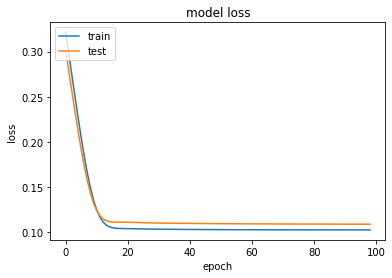

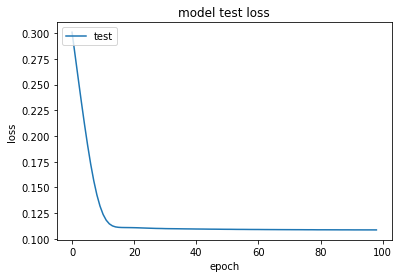

In [29]:
save_image()

In [95]:
from sklearn.preprocessing import StandardScaler
def data_prediction(path):
    
    df = load_csv(path)
    df.sort_values(by='Bulan', ascending=True)
    df = drop_column(df,['Tahun','Suhu','Kelembapan','Curah_hujan',
                    'Lama_penyinaran_matahari','Angin','Jumlah_penduduk','IR'])
    df['total_kasus'] = df['Jumlah Kasus']
    df = drop_column(df,['Bulan','Jumlah Kasus'])
    df = encoder(df)
    df = df.values
        
    X = df[:,0]
    X = X.reshape(-1,1)
    print(X)
    Y_test = scaler.fit_transform(X)
    print(Y_test)
    return Y_test
    

In [96]:
dataTest = data_prediction('prediction_data_min.csv')

[[6]
 [2]
 [1]
 [0]
 [5]
 [3]
 [4]
 [7]
 [8]]
[[0.75 ]
 [0.25 ]
 [0.125]
 [0.   ]
 [0.625]
 [0.375]
 [0.5  ]
 [0.875]
 [1.   ]]


In [118]:
prediction(dataTest,1,1,2019)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Model Loaded
real_district [6 2 1 0 5 3 4 7 8]
district [0.75  0.25  0.125 0.    0.625 0.375 0.5   0.875 1.   ]
month- 0
   Bulan ke  Tahun     Kecamatan  Jumlah Kasus
0         1   2019       Meuraxa             5
1         1   2019     Jaya Baru             4
2         1   2019    Banda Raya             4
3         1   2019  Baiturrahman             4
4         1   2019    Lueng Bata  

'Prediction saved'